<a href="https://colab.research.google.com/github/tasneem96/Deep-Learning-Practice/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
(x_train, y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train = y_train.reshape(-1)

In [9]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
def sample_image(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

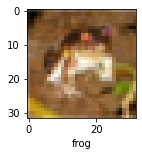

In [11]:
sample_image(x_train,y_train,0)

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [15]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10,dtype = 'float32'
)

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10,dtype = 'float32'
)

In [33]:
model = keras.Sequential(
   [
    keras.layers.Flatten (input_shape = (32,32,3,)),
    keras.layers.Dense (3000, activation = 'relu'),
    keras.layers.Dense (1000, activation = 'relu'),
    keras.layers.Dense (10, activation = 'sigmoid')
   ]
)

model.compile(
    optimizer = 'SGD',
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)


model.fit(x_train,y_train_categorical,epochs = 5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 110s 70ms/step - loss: 1.8096 - accuracy: 0.3550
Epoch 2/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.6217 - accuracy: 0.4289
Epoch 3/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5410 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4802 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4330 - accuracy: 0.4969


In [35]:
model.evaluate (x_test,y_test_categorical)

  3/313 [..............................] - ETA: 8s - loss: 1.3191 - accuracy: 0.6146 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 9s 27ms/step - loss: 1.4725 - accuracy: 0.4763


[1.4725453853607178, 0.4763000011444092]

In [31]:
CnnModel = keras.Sequential(
    [
        #Convolution+relu
        #Polling
      keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
      keras.layers.MaxPooling2D(2,2),

      keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      keras.layers.MaxPooling2D(2,2),

      keras.layers.Flatten (),
      keras.layers.Dense (100, activation = 'relu'),
      keras.layers.Dense (10, activation = 'sigmoid')
   ]

    
)

CnnModel.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

CnnModel.fit(x_train,y_train,epochs = 5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 58s 36ms/step - loss: 1.4746 - accuracy: 0.4708
Epoch 2/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1417 - accuracy: 0.5977
Epoch 3/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.0174 - accuracy: 0.6442
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9236 - accuracy: 0.6770
Epoch 5/5
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8581 - accuracy: 0.7008


In [34]:
CnnModel.evaluate(x_test,y_test)

  6/313 [..............................] - ETA: 3s - loss: 0.8684 - accuracy: 0.7031 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 4s 11ms/step - loss: 0.9394 - accuracy: 0.6733


[0.9394413232803345, 0.67330002784729]

In [38]:
from sklearn.metrics import classification_report , confusion_matrix

y_pred = model.predict(x_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print('Classification_report: \n', classification_report(y_test,y_pred_class))

Classification_report: 
               precision    recall  f1-score   support

           0       0.50      0.61      0.55      1000
           1       0.67      0.57      0.62      1000
           2       0.40      0.31      0.35      1000
           3       0.31      0.42      0.36      1000
           4       0.54      0.24      0.33      1000
           5       0.45      0.24      0.32      1000
           6       0.35      0.80      0.49      1000
           7       0.68      0.41      0.51      1000
           8       0.63      0.61      0.62      1000
           9       0.59      0.55      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



In [39]:
y_pred = CnnModel.predict(x_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print('Classification_report: \n', classification_report(y_test,y_pred_class))

Classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.76      0.73      1000
           1       0.79      0.78      0.79      1000
           2       0.51      0.62      0.56      1000
           3       0.52      0.41      0.46      1000
           4       0.61      0.58      0.60      1000
           5       0.54      0.60      0.57      1000
           6       0.77      0.75      0.76      1000
           7       0.80      0.70      0.75      1000
           8       0.75      0.78      0.77      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

